In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

In [2]:
from dataset import CHDataset
from convex_hull import training, eval_one_example, eval_model, PlotLossCurve
from pointer_network import PointerNet, PointerNetLoss
from TSPDataset import TSPDataset

In [3]:
train_filename="./data/convex_hull_50_train.txt" 
val_filename = "./data/convex_hull_50_test.txt"

max_in_seq_len=50
max_out_seq_len=11
num_layers = 1
rnn_hidden_size = 32

model = PointerNet("LSTM", True, num_layers, 2, rnn_hidden_size, 0.0)

train_ds = CHDataset(train_filename, max_in_seq_len, max_out_seq_len, 2e4)
eval_ds = CHDataset(val_filename, max_in_seq_len, max_out_seq_len, 1e3)

print("Train data size: {}".format(len(train_ds)))
print("Eval data size: {}".format(len(eval_ds)))

Train data size: 20000
Eval data size: 1000


In [4]:
cudaAvailable = torch.cuda.is_available()
print(cudaAvailable)

True


In [5]:
TrainingLoss, EvalLoss = training(model, train_ds, eval_ds, cudaAvailable, nepoch=30, freqEval=5)

D:\matricula u chile 2015\12 semestre\Trabajo_dirigido\Diego\codigo\PointerNetwork\convex_hull.py:179: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  clip_grad_norm(model.parameters(), clip_norm)


Epoch : 0, loss 1.2182404302954675
Epoch: 0, Eval Loss 0.847038919955492
Epoch : 1, loss 0.7536873981356621
Epoch : 2, loss 0.6485088189959526
Epoch : 3, loss 0.5945986782364547
Epoch : 4, loss 0.562306798107177
Epoch : 5, loss 0.5397270621664823
Epoch: 5, Eval Loss 0.5331619176417589
Epoch : 6, loss 0.5234544403932989
Epoch : 7, loss 0.5105805751189589
Epoch : 8, loss 0.49935362021774055
Epoch : 9, loss 0.4892207261778414
Epoch : 10, loss 0.4808284835468978
Epoch: 10, Eval Loss 0.48039661985635757
Epoch : 11, loss 0.4738201278757304
Epoch : 12, loss 0.46737350049242377
Epoch : 13, loss 0.4614636353302747
Epoch : 14, loss 0.45638306415714325
Epoch : 15, loss 0.45159429302960635
Epoch: 15, Eval Loss 0.4519965361952782
Epoch : 16, loss 0.4470672408375889
Epoch : 17, loss 0.4431911987382919
Epoch : 18, loss 0.43981190046072005
Epoch : 19, loss 0.4368873704716563
Epoch : 20, loss 0.4341901934798807
Epoch: 20, Eval Loss 0.4359943869113922
Epoch : 21, loss 0.43176953313201666
Epoch : 22, los

In [7]:
hours, rem = divmod(14564.804045, 3600)
minutes, seconds = divmod(rem, 60)

print("Training of Pointer Networks takes: {:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

Training of Pointer Networks takes: 04:02:44.80


In [6]:
model.load_state_dict(torch.load("PointerModel.pt"))

<All keys matched successfully>

In [8]:
eval_model(model, train_ds, cudaAvailable)

The Accuracy of the model is: 0.42635


In [9]:
eval_model(model, eval_ds, cudaAvailable)

The Accuracy of the model is: 0.421


In [11]:
example = train_ds.__getitem__(0)
print(example[0].shape)

(51, 2)


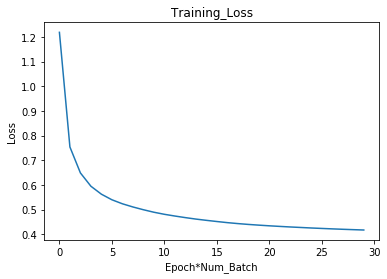

In [10]:
PlotLossCurve(TrainingLoss, "Training_Loss", shape = (10, 10))

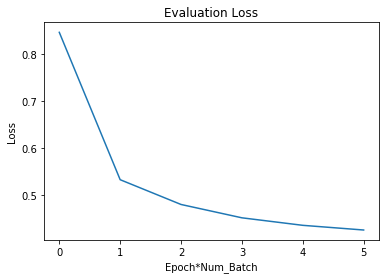

In [11]:
PlotLossCurve(EvalLoss, "Evaluation Loss", shape=(10, 10))

## RL training

In [3]:
from RLtraining import NeuronalOptm

In [4]:
seq_len = 20
num_layers = 1 # Se procesa con sola una celula por coordenada. 
input_lenght = 2 
rnn_hidden_size = 128
rnn_type = 'LSTM'
bidirectional = False
hidden_dim_critic = rnn_hidden_size
process_block_iter = 3
inp_len_seq = seq_len
lr = 1e-3
C = 1
batch_size = 128
n_epoch = 50
embedding_dim = 128 #d-dimensional embedding dim
embedding_dim_critic = embedding_dim

save_model_file="RLPointerModel_TSP20.pt"

In [5]:
train_filename="./CH_TSP_data/tsp_all_len20.txt" 
val_filename = "./CH_TSP_data/tsp_20_test.txt"

train_ds = TSPDataset(train_filename, seq_len, lineCountLimit=-1)
eval_ds = TSPDataset(val_filename, seq_len, lineCountLimit=-1)
    
print("Train data size: {}".format(len(train_ds)))
print("Eval data size: {}".format(len(eval_ds)))

Train data size: 100000
Eval data size: 10000


In [6]:
trainer = NeuronalOptm(input_lenght, rnn_type, bidirectional, num_layers, rnn_hidden_size, 
                           embedding_dim, hidden_dim_critic, process_block_iter, inp_len_seq, lr, 
                           C=C, batch_size=batch_size)

In [7]:
Actor_Training_Loss, Critic_Training_Loss, Tour_training_mean = trainer.training(train_ds, eval_ds,
                                                                                     save_model_file=save_model_file,
                                                                                     nepoch=n_epoch)

KeyboardInterrupt: 